<a href="https://colab.research.google.com/github/Shounak-bhattacharya/c4projectsml/blob/master/fminstdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
#print(tf.__version__)

In [3]:
mnist=tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) =mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

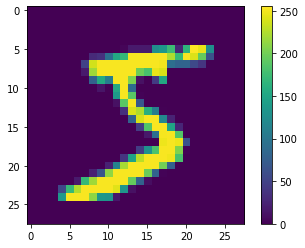

In [9]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

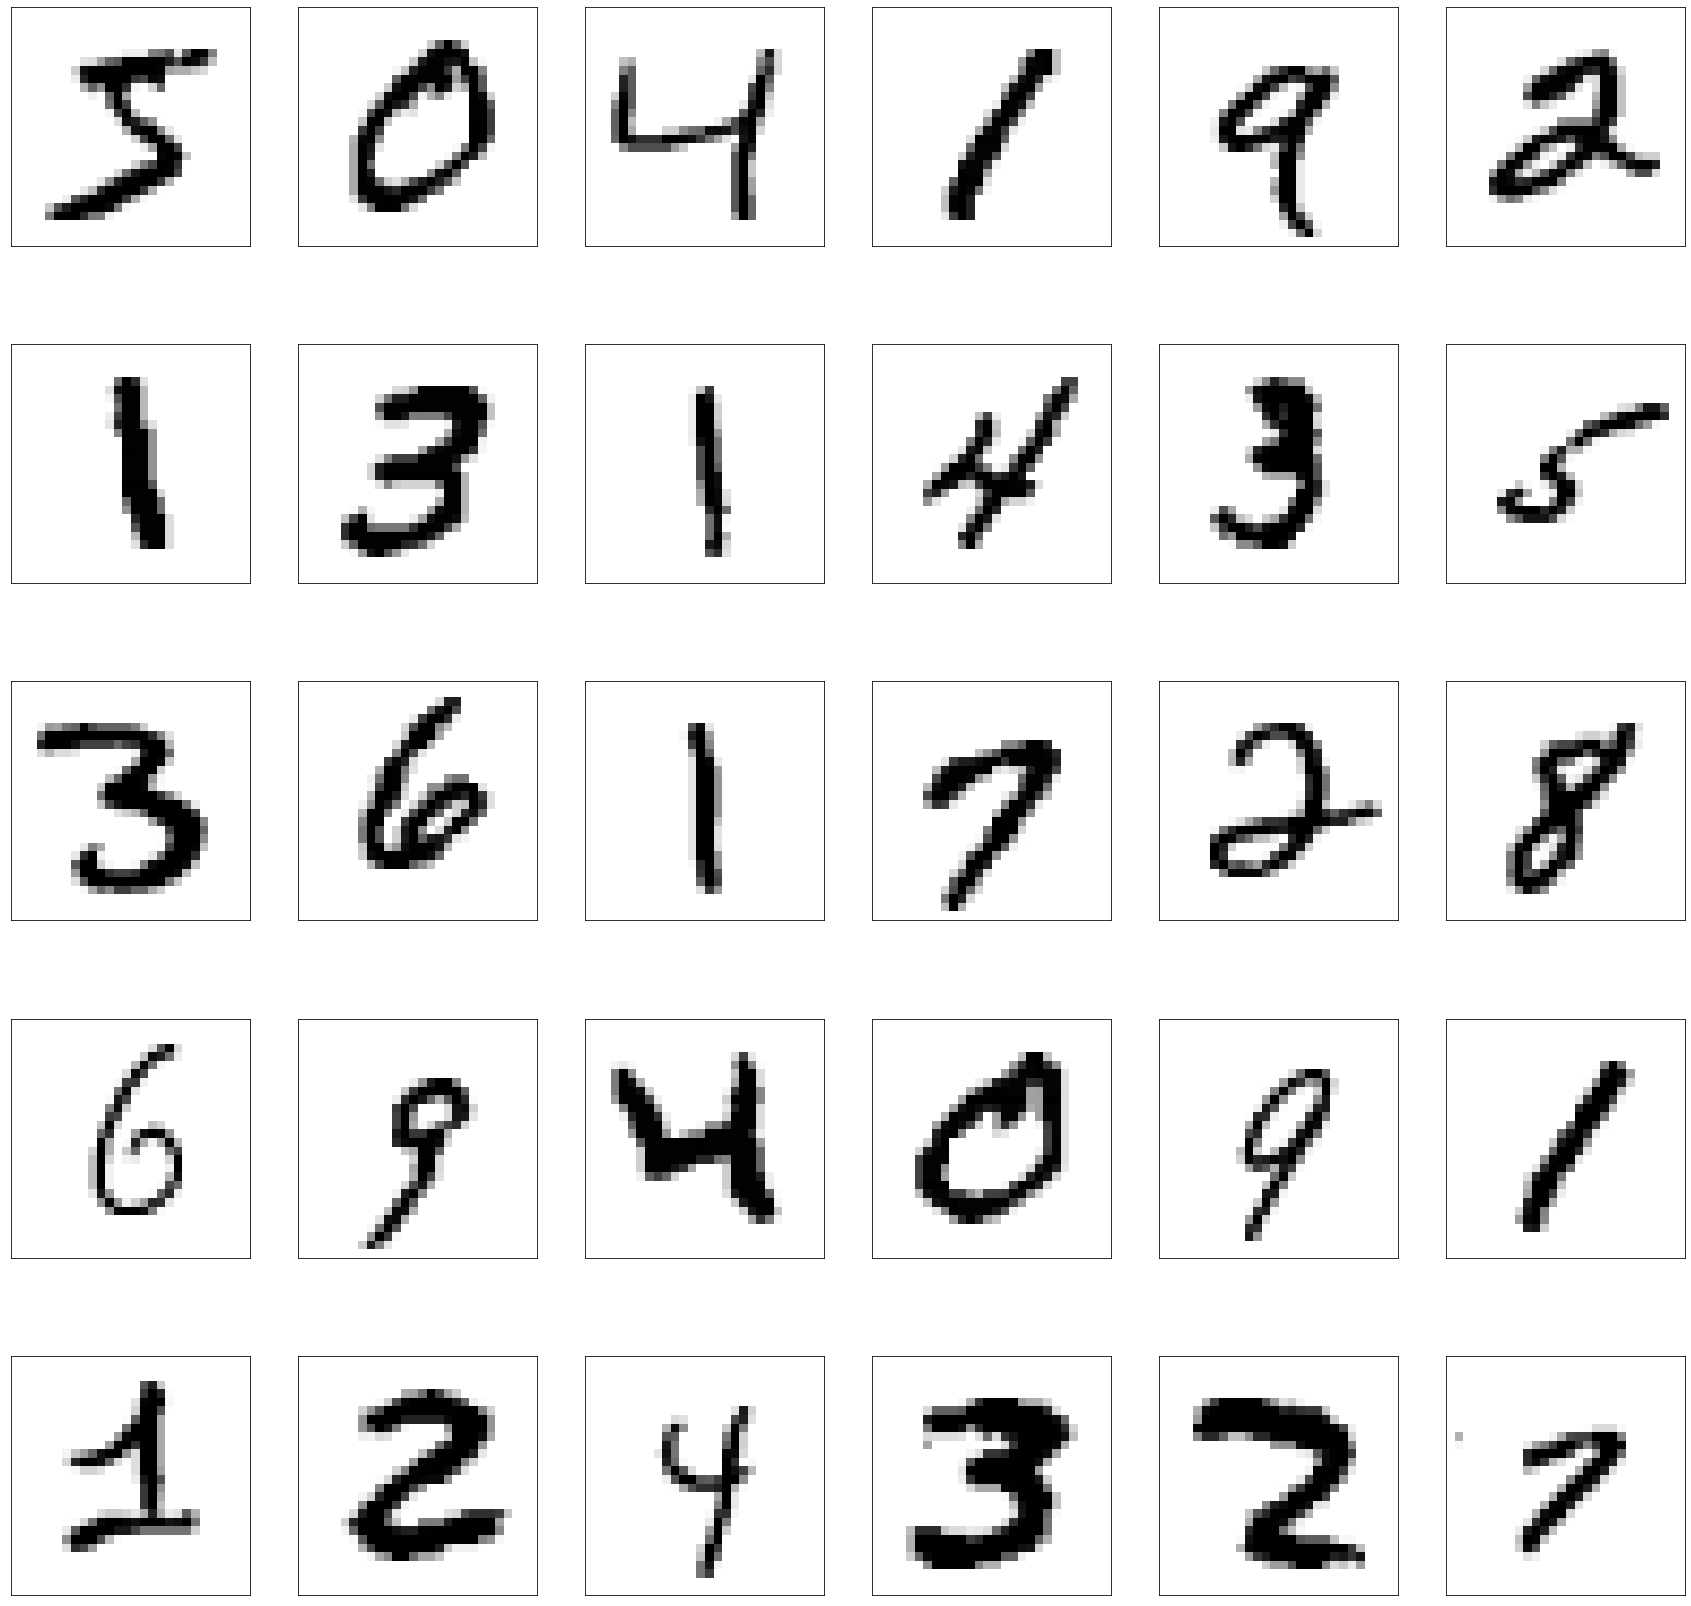

In [10]:
plt.figure(figsize=(30,30))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')>0.02):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' , metrics='accuracy')


In [99]:
model.fit(X_train, y_train,callbacks=[callbacks], validation_data=(X_test, y_test), batch_size=128, epochs=10)

Epoch 1/10
465/469 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9949
Reached 98% accuracy so cancelling training!
469/469 [==============================] - 2s 5ms/step - loss: 0.0233 - accuracy: 0.9948 - val_loss: 0.1960 - val_accuracy: 0.9730


In [96]:
model.fit(X_train, y_train,callbacks=[callbacks], validation_data=(X_train, y_train), batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0315 - accuracy: 0.9912 - val_loss: 0.0277 - val_accuracy: 0.9922
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0263 - accuracy: 0.9924 - val_loss: 0.0172 - val_accuracy: 0.9948
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0256 - accuracy: 0.9925 - val_loss: 0.0168 - val_accuracy: 0.9947
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0250 - accuracy: 0.9929 - val_loss: 0.0300 - val_accuracy: 0.9918
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0288 - accuracy: 0.9922 - val_loss: 0.0138 - val_accuracy: 0.9957
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0288 - accuracy: 0.9919 - val_loss: 0.0181 - val_accuracy: 0.9947
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0227 - accuracy: 0.9935 - val_loss: 0.0214 - val_accuracy: 0.9948
Epoch 